In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('sample.xlsx')

In [3]:
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


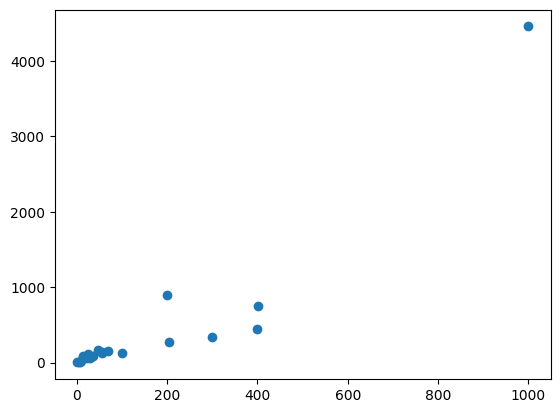

In [4]:
# Let's check the relationship between dependent variable 'x' and dependent variable i.e 'sum'

plt.scatter(data['x'], data['sum'])
plt.show()

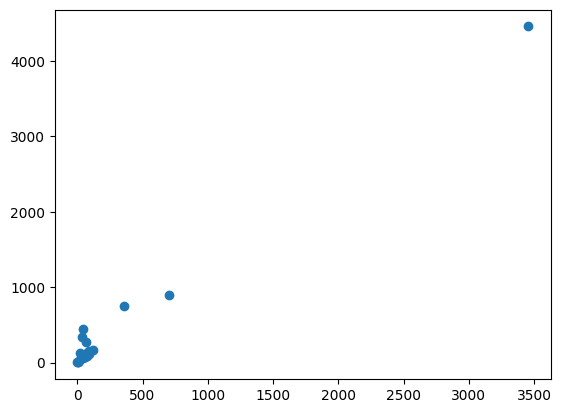

In [5]:
# Let's check the relationship between dependent variable 'y' and dependent variable i.e 'sum'

plt.scatter(data['y'], data['sum'])
plt.show()

###  Storing feature matrix in X and Response (Target) in vector y

In [6]:
X = data[['x', 'y']]
y = data['sum']

## Train/test Split
### 1. Split data into two part i.e training set and testing set
### 2. Train the model on training set
### 3. Test the model on testing set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [8]:
X_train

,x,y
3,10.0,10.0
4,30.0,30.0
17,400.0,45.7
12,12.5,56.7
18,34.6,56.9
16,203.6,67.9
2,6.0,6.0
9,56.0,78.0
21,1000.0,3456.0
7,100.0,22.0


### Import and train the model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Check model's prediction performance

In [11]:
model.score(X_train, y_train)

1.0

In [12]:
model.score(X_test, y_test)

1.0

### Now let's compare the results

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred

array([  2. , 112.9,  68. ,   8. , 900. ,  66. , 169.4, 334. ])

In [15]:
y_test

0       2.0
13    112.9
8      68.0
1       8.0
15    900.0
5      66.0
20    169.4
11    334.0
Name: sum, dtype: float64

In [16]:
# Let's make a pandas DataFrame to see the results

df = pd.DataFrame({'Actual' : y_test, 'Prediction' : y_pred})

df

,Actual,Prediction
0,2.0,2.0
13,112.9,112.9
8,68.0,68.0
1,8.0,8.0
15,900.0,900.0
5,66.0,66.0
20,169.4,169.4
11,334.0,334.0


### Prediction

In [17]:
abc = model.predict([[10,20]])

F:\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
abc

array([30.])

In [19]:
xyz = model.predict([[223.2, 1123.11]])

xyz

F:\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1346.31])

### Saving model using Joblib

In [20]:
import joblib

In [21]:
joblib.dump(model, 'only_add')

['only_add']

In [22]:
test1 = joblib.load('only_add')

In [23]:
test1.predict([[10, 50]])

F:\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.])

## Creating GUI

In [24]:
X = data[['x', 'y']]
y = data['sum']

In [25]:
# Training the model on entire data set

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [26]:
joblib.dump(model, 'only_add')

['only_add']

In [27]:
test2 = joblib.load('only_add')

In [28]:
test2.predict([[21, 69]])

F:\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([90.])

##  GUI

In [29]:
from tkinter import *
import joblib

In [36]:
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    
    model = joblib.load('only_add')
    result = model.predict([[p1, p2]])
    
    Label(master, text = 'Sum is = ').grid(row = 4)
    Label(master, text = result).grid(row = 5)
    
    print("Sum is", result) # it shows result/output in the next box


# Create the Tkinter window
master = Tk()

master.title("Addition of two numbers using ML")

# Add a label for the title
label = Label(master, text="Addition of two numbers using ML", bg='black', fg='white').grid(row=0, columnspan=2)

# Add labels for input fields
Label(master, text="Enter First Number").grid(row=1)
Label(master, text="Enter Second Number").grid(row=2)

# Create input entry fields
e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

# Add a button to trigger the prediction
Button(master, text='Predict', command=show_entry_fields).grid()

# Start the main event loop
mainloop()